In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')





df = pd.read_csv(r"/u01/jupyter-scripts/TonyS/VCIS/src/vcis/smoothing/device_behavior_clustering/df_history_913.csv").drop(columns="Unnamed: 0")
pd.set_option("display.max_rows",100)
# Remove the column and insert it at the new position
# Sort by device_id and timestamp
df = df.sort_values(by=['device_id', 'usage_timeframe']).reset_index(drop=True)
df.insert(0, "inner_index",df.groupby('device_id').cumcount())
df['usage_timeframe'] = pd.to_datetime(df['usage_timeframe'], unit='ms')

df

,inner_index,device_id,location_latitude,location_longitude,usage_timeframe,location_name,service_provider_id,latitude_grid,longitude_grid,grid
0,0,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832800,35.590760,2023-09-26 00:27:34,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
1,1,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832840,35.590700,2023-09-26 00:46:43,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
2,2,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832620,35.591000,2023-09-26 01:07:15,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
3,3,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832610,35.591000,2023-09-26 01:27:16,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
4,4,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832690,35.591020,2023-09-26 01:46:53,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
...,...,...,...,...,...,...,...,...,...,...
241746,1346,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.897009,35.564514,2023-10-14 12:35:41,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,9,33.897209,35.565031,"33.897209108832094,35.56503110993819"
241747,1347,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.870706,35.551414,2023-10-14 23:42:23,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.870982,35.550978,"33.87098232857634,35.55097784455637"
241748,1348,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.870706,35.551414,2023-10-14 23:42:23,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,9,33.870982,35.550978,"33.87098232857634,35.55097784455637"
241749,1349,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.874783,35.550901,2023-10-14 23:47:34,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.874600,35.550978,"33.87459981550816,35.55097784455637"


In [8]:
df = df.drop_duplicates(subset=["location_latitude",'location_longitude','usage_timeframe'])
df

,inner_index,device_id,location_latitude,location_longitude,usage_timeframe,location_name,service_provider_id,latitude_grid,longitude_grid,grid,next_timestamp,time_diff,large_gap,session_id
0,0,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832800,35.590760,2023-09-26 00:27:34,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386",2023-09-26 00:46:43,19.150000,False,0
1,1,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832840,35.590700,2023-09-26 00:46:43,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386",2023-09-26 01:07:15,20.533333,False,0
2,2,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832620,35.591000,2023-09-26 01:07:15,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386",2023-09-26 01:27:16,20.016667,False,0
3,3,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832610,35.591000,2023-09-26 01:27:16,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386",2023-09-26 01:46:53,19.616667,False,0
4,4,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832690,35.591020,2023-09-26 01:46:53,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386",2023-09-26 02:07:14,20.350000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241741,1341,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.889626,35.559459,2023-10-14 03:21:29,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.889974,35.559626,"33.88997413496843,35.55962600786826",2023-10-14 11:02:59,461.500000,False,3
241743,1343,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.896951,35.564469,2023-10-14 11:02:59,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.897209,35.563950,"33.897209108832094,35.563950089524205",2023-10-14 12:35:41,92.700000,False,3
241745,1345,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.897009,35.564514,2023-10-14 12:35:41,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.897209,35.565031,"33.897209108832094,35.56503110993819",2023-10-14 23:42:23,666.700000,False,3
241747,1347,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.870706,35.551414,2023-10-14 23:42:23,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.870982,35.550978,"33.87098232857634,35.55097784455637",2023-10-14 23:47:34,5.183333,False,3


In [6]:
# Calculate time differences
df['next_timestamp'] = df.groupby('device_id')['usage_timeframe'].shift(-1)
df['time_diff'] = (df['next_timestamp'] - df['usage_timeframe']).dt.total_seconds() / 60  # Time difference in minutes

# df['time_diff'] = df['time_diff'].fillna(0)

# Define a threshold for maximum allowed gap in minutes (e.g., 1440 minutes = 1 day)
threshold = 1440

# Flag rows where the time difference exceeds the threshold
df['large_gap'] = df['time_diff'] > threshold

# Initialize session_id
df['session_id'] = 0

# Increment session_id where large gaps are detected
df['session_id'] = df.groupby('device_id')['large_gap'].cumsum()

# Optionally, you can reset the session_id to start from 0 for each device_id
df['session_id'] = df.groupby('device_id')['session_id'].apply(lambda x: x - x.min())

In [9]:
# Calculate session-specific durations
df['next_timestamp'] = df.groupby(['device_id', 'session_id'])['usage_timeframe'].shift(-1)
df['duration'] = (df['next_timestamp'] - df['usage_timeframe']).dt.total_seconds() / 60  # Duration in minutes

# Fill NaN durations with zero for the last records within each session
df['duration'] = df['duration'].fillna(0)

# Drop rows with large gaps if needed
filtered_data = df[~df['large_gap']]


In [16]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from datetime import datetime
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import haversine_distances

# Function to calculate co-location frequency
def co_location(df, max_distance=0.1, time_window='5min'):
    co_located = []
    for device in df['device_id'].unique():
        device_data = df[df['device_id'] == device]
        for _, row in device_data.iterrows():
            nearby_devices = df[
                (df['usage_timeframe'].between(row['usage_timeframe'] - pd.Timedelta(time_window), row['usage_timeframe'] + pd.Timedelta(time_window))) &
                (df['device_id'] != device)
            ]
            for _, nearby_row in nearby_devices.iterrows():
                if geodesic((row['location_latitude'], row['location_longitude']), (nearby_row['location_latitude'], nearby_row['location_longitude'])).km <= max_distance:
                    co_located.append((row['device_id'], nearby_row['device_id'], row['usage_timeframe']))
    return co_located

co_location_events = co_location(df[:10000])
co_location_events

# # Convert co-location events to DataFrame
# co_location_df = pd.DataFrame(co_location_events, columns=['device_1', 'device_2', 'usage_timeframe'])

# # Calculate distance and bearing for each device
# def calculate_distance_and_bearing(df):
#     df = df.sort_values(by=['device_id', 'usage_timeframe'])
#     df['prev_latitude'] = df.groupby('device_id')['location_latitude'].shift(1)
#     df['prev_longitude'] = df.groupby('device_id')['location_longitude'].shift(1)
#     df['prev_usage_timeframe'] = df.groupby('device_id')['usage_timeframe'].shift(1)
    
#     # Calculate distances
#     df['distance'] = df.apply(lambda row: geodesic(
#         (row['location_latitude'], row['location_longitude']),
#         (row['prev_latitude'], row['prev_longitude'])
#     ).meters if pd.notnull(row['prev_latitude']) else 0, axis=1)
    
#     # Calculate bearing
#     def calculate_bearing(lat1, lon1, lat2, lon2):
#         if pd.notnull(lat1) and pd.notnull(lat2):
#             lat1 = np.radians(lat1)
#             lon1 = np.radians(lon1)
#             lat2 = np.radians(lat2)
#             lon2 = np.radians(lon2)
#             dlon = lon2 - lon1
#             x = np.sin(dlon) * np.cos(lat2)
#             y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
#             bearing = (np.degrees(np.arctan2(x, y)) + 360) % 360
#             return bearing
#         else:
#             return np.nan

#     df['bearing'] = df.apply(lambda row: calculate_bearing(row['prev_latitude'], row['prev_longitude'], row['location_latitude'], row['location_longitude']), axis=1)
    
#     return df

# df = calculate_distance_and_bearing(df)

# # Identify frequent locations (e.g., home, work)
# def find_frequent_locations(df, eps=0.001, min_samples=10):
#     locations = df[['location_latitude', 'location_longitude']]
#     db = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine').fit(np.radians(locations))
#     df['location_cluster'] = db.labels_
#     return df

# df = find_frequent_locations(df)

# # Extract time of day and day of week
# df['hour'] = df['usage_timeframe'].dt.hour
# df['day_of_week'] = df['usage_timeframe'].dt.dayofweek

# # Convert location_latitude and location_longitude to radians for haversine distance
# df['latitude_rad'] = np.radians(df['location_latitude'])
# df['longitude_rad'] = np.radians(df['location_longitude'])

# # Analyze the similarity of travel routes taken by different devices
# def route_similarity(df):
#     devices = df['device_id'].unique()
#     similarity_matrix = np.zeros((len(devices), len(devices)))

#     for i, device_a in enumerate(devices):
#         data_a = df[df['device_id'] == device_a]
#         for j, device_b in enumerate(devices):
#             if i != j:
#                 data_b = df[df['device_id'] == device_b]
#                 distances = haversine_distances(data_a[['latitude_rad', 'longitude_rad']].values, data_b[['latitude_rad', 'longitude_rad']].values)
#                 similarity_matrix[i, j] = distances.mean()

#     return similarity_matrix

# route_similarity_matrix = route_similarity(df)

# # Aggregate features for clustering
# features = df[['device_id', 'location_latitude', 'location_longitude', 'hour', 'day_of_week', 'distance', 'bearing', 'location_cluster']]
# features = features.fillna(0)

# # Include route similarity as a feature
# features['route_similarity'] = 0
# for i, device in enumerate(features['device_id'].unique()):
#     features.loc[features['device_id'] == device, 'route_similarity'] = route_similarity_matrix[i].mean()

# # Scale features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features.drop(columns=['device_id']))


# # Output the clustered df
# df.to_csv('clustered_devices.csv', index=False)


[('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 02:52:03')),
 ('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 04:11:51')),
 ('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 05:31:55')),
 ('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 05:32:25')),
 ('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 05:32:28')),
 ('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 05:46:06')),
 ('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 06:39:14')),
 ('04230ce9-9cc9-429e-a734-3ecc2b5d1d2c',
  '08560be7-1bb1-457e-a268-6ebb5c9a3a5b',
  Timestamp('2023-10-10 07:42:20')),
 ('04230ce9-9cc9-429e-a734-3ecc2

In [72]:
# Spatial Features:
##########################
# Unique Locations
unique_locations = filtered_data.groupby('device_id')['grid'].nunique().reset_index(name='unique_locations')

# # Most Frequent Location
most_frequent_location = filtered_data.groupby(['device_id', 'grid']).size().reset_index(name='counts').sort_values(['device_id', 'counts'], ascending=[True, False]).drop_duplicates('device_id')
#.groupby("device_id").max()
most_frequent_location.columns = ['device_id','most_frequent_grid','counts']
# Location Entropy
import numpy as np

def calculate_entropy(x):
    p_data = x.value_counts() / len(x)  # calculates the probabilities
    entropy = -sum(p_data * np.log2(p_data))  # input probabilities to get the entropy 
    return entropy

location_entropy = filtered_data.groupby('device_id')['grid'].apply(calculate_entropy).reset_index(name='location_entropy')


In [73]:
#Temporal Features:
#######################
# Total Duration
# total_duration = filtered_data.groupby('device_id')['duration'].sum().reset_index(name='total_duration')

# Average Duration
average_duration = filtered_data.groupby('device_id')['duration'].mean().reset_index(name='average_duration').sort_values("average_duration",ascending=False)

# Time of Day Patterns
filtered_data['time_of_day'] = pd.cut(filtered_data['usage_timeframe'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right= False)
time_of_day_patterns = filtered_data.groupby(['device_id', 'time_of_day']).size().unstack(fill_value=0).reset_index()



In [74]:
from scipy.sparse import csr_matrix, hstack
# # Dwell Time (Average Duration at each Location)
dwell_time = filtered_data.groupby(['device_id', 'grid'])['duration'].mean().unstack(fill_value=0).reset_index()
# Convert dwell time DataFrame to a sparse matrix
dwell_time_sparse = csr_matrix(dwell_time.set_index('device_id').values)


In [75]:
# Merging all features into a single DataFrame
features = unique_locations.merge(average_duration, on='device_id')
# features = features.merge(total_duration, on='device_id')
features = features.merge(most_frequent_location[['device_id', 'most_frequent_grid']], on='device_id', suffixes=('', '_most_frequent'))
features = features.merge(location_entropy, on='device_id')
features = features.merge(time_of_day_patterns, on='device_id')

# # Add transition and dwell time features
# transition_features = transitions.set_index('device_id')
# dwell_time_features = dwell_time.set_index('device_id')

# Join transition_features and dwell_time_features with features DataFrame






# # Fill NaNs with zero for transition and dwell time features
# features.fillna(0, inplace=True)


In [85]:
from sklearn.preprocessing import StandardScaler

# Selecting features for scaling (excluding categorical ones like 'location_most_frequent')
feature_cols = ['unique_locations',  'average_duration', 'location_entropy', 'Morning', 'Afternoon', 'Evening', 'Night']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[feature_cols])


In [93]:
# Add sparse matrix features to scaled features
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# combined_features = csr_matrix(scaled_features).toarray()  # Convert scaled features to array
# combined_features = hstack([combined_features, dwell_time_sparse])

# Apply clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Assuming combined_features is your combined feature matrix (sparse and non-sparse)
agg_cluster = AgglomerativeClustering(n_clusters=5)
cluster_labels = agg_cluster.fit_predict(scaled_features)

# Evaluate clustering performance (if possible)
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_avg}")


# Add cluster labels to the features DataFrame
features['cluster'] = cluster_labels

Silhouette Score (Agglomerative Clustering): 0.35173425959897997


In [94]:
features["cluster"].value_counts()

1    44
4    27
3    13
0     7
2     1
Name: cluster, dtype: int64

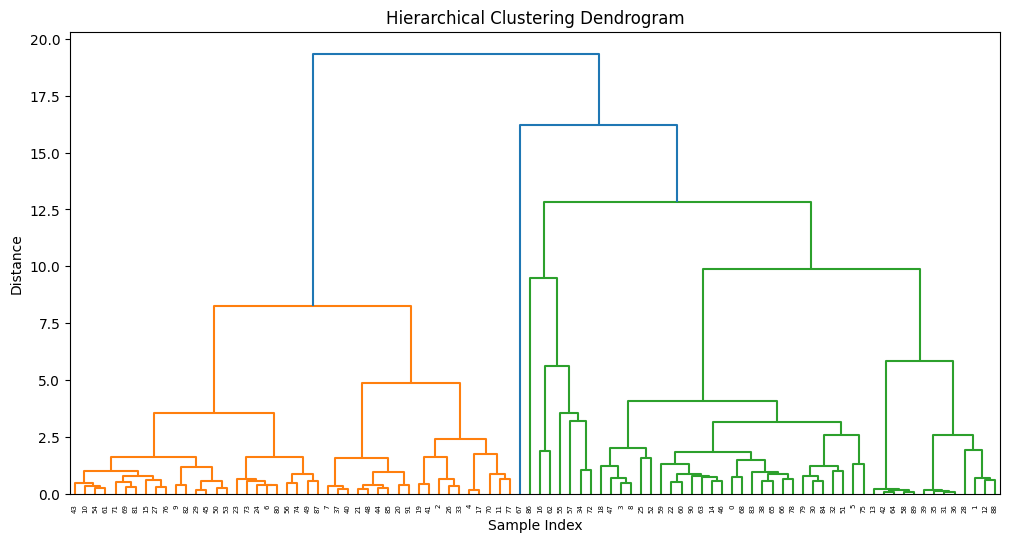

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# Perform Agglomerative Clustering
# Compute linkage matrix
linkage_matrix = linkage(scaled_features, method='ward')  # You can choose other linkage methods like 'single', 'complete', 'average', etc.

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)  # Adjust `p` to control the number of levels shown
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [35]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.cluster import KMeans
import numpy as np
# Convert usage_timeframe to datetime
df['usage_timeframe'] = pd.to_datetime(df['usage_timeframe'], unit='ms')

# Sort data by device_id and usage_timeframe
df.sort_values(by=['device_id', 'usage_timeframe'], inplace=True)


df

,device_id,location_latitude,location_longitude,usage_timeframe,location_name,service_provider_id,latitude_grid,longitude_grid,grid
2013,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832800,35.590760,2023-09-26 00:27:34,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
2014,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832840,35.590700,2023-09-26 00:46:43,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
2015,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832620,35.591000,2023-09-26 01:07:15,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
2016,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832610,35.591000,2023-09-26 01:27:16,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
2017,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,33.832690,35.591020,2023-09-26 01:46:53,04230ce9-9cc9-429e-a734-3ecc2b5d1d2c,9,33.832999,35.590976,"33.83299871579214,35.59097559987386"
...,...,...,...,...,...,...,...,...,...
16869,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.897009,35.564514,2023-10-14 12:35:41,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,9,33.897209,35.565031,"33.897209108832094,35.56503110993819"
16199,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.870706,35.551414,2023-10-14 23:42:23,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.870982,35.550978,"33.87098232857634,35.55097784455637"
16870,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.870706,35.551414,2023-10-14 23:42:23,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,9,33.870982,35.550978,"33.87098232857634,35.55097784455637"
16200,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,33.874783,35.550901,2023-10-14 23:47:34,ecf31b05-809b-45d8-a9ba-53cafe93e7d5,8,33.874600,35.550978,"33.87459981550816,35.55097784455637"


In [3]:
df["device_id"].nunique()

95

total_time              False
total_pings             False
mean_stay_duration      False
unique_grids_visited    False
dtype: bool
                               device_id  cluster_hierarchical
0   04230ce9-9cc9-429e-a734-3ecc2b5d1d2c                     1
1   04b490b7-1413-4a09-a2aa-d8031b3cd5f2                     1
2   05521223-c7d6-4ba0-a1ad-46d24354b678                     1
3   079AA611-E1FC-495A-A93A-2DF58F0F9BBB                     1
4   08493efe-9645-4062-956e-7ff273362bb3                     1
..                                   ...                   ...
90  c972e88b-8ff0-42a0-a708-ad49b4a93457                     1
91  d7090b29-2139-49de-a19e-db4e12819e9f                     1
92  ea830a7f-4e1c-42db-8d38-c1404f1b7aff                     3
93  eb1c1e9e-b4c8-47af-ae99-c3499742f95b                     1
94  ecf31b05-809b-45d8-a9ba-53cafe93e7d5                     1

[95 rows x 2 columns]


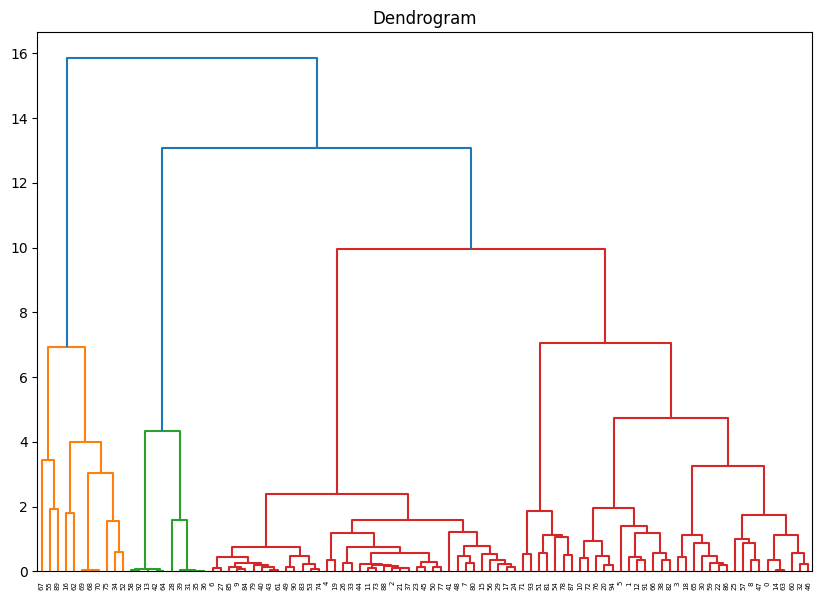

                               device_id  cluster_dbscan
0   04230ce9-9cc9-429e-a734-3ecc2b5d1d2c               0
1   04b490b7-1413-4a09-a2aa-d8031b3cd5f2               1
2   05521223-c7d6-4ba0-a1ad-46d24354b678               2
3   079AA611-E1FC-495A-A93A-2DF58F0F9BBB               3
4   08493efe-9645-4062-956e-7ff273362bb3               4
..                                   ...             ...
90  c972e88b-8ff0-42a0-a708-ad49b4a93457               2
91  d7090b29-2139-49de-a19e-db4e12819e9f               1
92  ea830a7f-4e1c-42db-8d38-c1404f1b7aff               6
93  eb1c1e9e-b4c8-47af-ae99-c3499742f95b              -1
94  ecf31b05-809b-45d8-a9ba-53cafe93e7d5               7

[95 rows x 2 columns]


In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Calculate time difference between consecutive rows for each device
df['time_diff'] = df.groupby('device_id')['usage_timeframe'].diff().dt.total_seconds()

# Replace NaN values in time_diff with 0
df['time_diff'].fillna(0, inplace=True)

# Aggregate features based on grid coordinates
grid_summary = df.groupby(['device_id', 'grid']).agg({
    'time_diff': 'sum',  # Total time spent in each grid
    'usage_timeframe': ['count', 'min', 'max'],  # Number of pings, first and last ping time
}).reset_index()

grid_summary.columns = ['device_id', 'grid', 'total_time_in_grid', 'ping_count_in_grid', 'first_usage', 'last_usage']

# Calculate stay duration in each grid
grid_summary['stay_duration_in_grid'] = (grid_summary['last_usage'] - grid_summary['first_usage']).dt.total_seconds()

# Extract grid coordinates
grid_summary[['latitude_grid', 'longitude_grid']] = grid_summary['grid'].str.split(',', expand=True).astype(float)

# Aggregate features across all grids for each device
device_summary = grid_summary.groupby('device_id').agg({
    'total_time_in_grid': 'sum',  # Total time spent across all grids
    'ping_count_in_grid': 'sum',  # Total number of pings
    'stay_duration_in_grid': 'mean',  # Average stay duration in grids
    'grid': 'nunique'  # Number of unique grids visited
}).reset_index()

device_summary.columns = ['device_id', 'total_time', 'total_pings', 'mean_stay_duration', 'unique_grids_visited']

# Perform clustering based on the summarized features
features = ['total_time', 'total_pings', 'mean_stay_duration', 'unique_grids_visited']
X = device_summary[features].fillna(0)

# Check for NaN in the feature set
print(X.isna().any())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')  # Adjust n_clusters as needed
device_summary['cluster_hierarchical'] = agg_clustering.fit_predict(X_scaled)

# Print cluster labels
print(device_summary[['device_id', 'cluster_hierarchical']])

# Plot dendrogram (optional, for visualization)
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()
# Standardize the features

# # Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust eps and min_samples based on your data
device_summary['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Print cluster labels
print(device_summary[['device_id', 'cluster_dbscan']])


In [41]:
# Using DBSCAN:
device_summary["cluster_dbscan"].value_counts()

 2    39
-1    21
 0    11
 6     5
 8     4
 1     3
 7     3
 9     3
 3     2
 4     2
 5     2
Name: cluster_dbscan, dtype: int64

In [54]:
device_summary["cluster_hierarchical"].value_counts()

1    80
3    10
0     3
2     2
Name: cluster_hierarchical, dtype: int64

In [47]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for DBSCAN
silhouette_dbscan = silhouette_score(X_scaled, device_summary['cluster_dbscan'])
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

# Calculate the silhouette score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X_scaled, device_summary['cluster_hierarchical'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index for DBSCAN
db_index_dbscan = davies_bouldin_score(X_scaled, device_summary['cluster_dbscan'])
print(f'Davies-Bouldin Index for DBSCAN: {db_index_dbscan}')

# Calculate the Davies-Bouldin Index for Hierarchical Clustering
db_index_hierarchical = davies_bouldin_score(X_scaled, device_summary['cluster_hierarchical'])
print(f'Davies-Bouldin Index for Hierarchical Clustering: {db_index_hierarchical}')


from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz Index for DBSCAN
ch_score_dbscan = calinski_harabasz_score(X_scaled, device_summary['cluster_dbscan'])
print(f'Calinski-Harabasz Index for DBSCAN: {ch_score_dbscan}')

# Calculate the Calinski-Harabasz Index for Hierarchical Clustering
ch_score_hierarchical = calinski_harabasz_score(X_scaled, device_summary['cluster_hierarchical'])
print(f'Calinski-Harabasz Index for Hierarchical Clustering: {ch_score_hierarchical}')



Silhouette Score for DBSCAN: 0.20037466148863312
Silhouette Score for Hierarchical Clustering: 0.48944246876892766
Davies-Bouldin Index for DBSCAN: 1.1442078350554166
Davies-Bouldin Index for Hierarchical Clustering: 0.6862367745450202
Calinski-Harabasz Index for DBSCAN: 16.075879488904402
Calinski-Harabasz Index for Hierarchical Clustering: 35.76170903956015
